In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.random_projection import SparseRandomProjection

from project_root.dataset.dataset_loader import DatasetLoader
from project_root.dataset.protein_dataset import ProteinDataset
from project_root.utils.feature_processor import (
    flatten_attention_weights,
    pad_attention_weights,
    apply_random_projection_globaly,
    apply_random_projection_by_prot,
)

# Define data path
path_dataset_folder = "../DATASETS/"

print(">>> Analyzing representation of attention weights...")

# Load data
loader = DatasetLoader(path_dataset_folder)
df = loader.load_dataframe()
embeddings, attention_weights = loader.load_embeddings_and_attention()

print(f"Data loaded → df: {df.shape}, embeddings: {len(embeddings)}, attention_weights: {len(attention_weights)}")


KeyboardInterrupt: 

In [2]:
attention_weights_by_prot = {}

for att in attention_weights:
    print(f"Attention weights: {att}")
    print(f"Shape: {attention_weights[att].shape}")

    proj = SparseRandomProjection(n_components=400, random_state=42)
    attention_weights_by_prot[att] = proj.fit_transform(attention_weights[att])

Attention weights: Q9Y2X8
Shape: (877, 877)
Attention weights: Q05086
Shape: (877, 877)
Attention weights: Q9Y6X0
Shape: (1598, 1598)
Attention weights: Q8BH75
Shape: (723, 723)
Attention weights: Q04120
Shape: (723, 723)
Attention weights: P61077
Shape: (723, 723)
Attention weights: Q16659
Shape: (723, 723)
Attention weights: Q6UWE0
Shape: (918, 918)
Attention weights: Q8IWX8
Shape: (918, 918)
Attention weights: P43364
Shape: (431, 431)
Attention weights: Q969T4
Shape: (431, 431)
Attention weights: P06151
Shape: (431, 431)
Attention weights: Q96LR5
Shape: (431, 431)
Attention weights: P23568
Shape: (396, 396)
Attention weights: Q06449
Shape: (396, 396)
Attention weights: P54786
Shape: (944, 944)
Attention weights: Q9VU87
Shape: (944, 944)
Attention weights: Q9Y2D8
Shape: (1077, 1077)
Attention weights: Q9VDV4
Shape: (1077, 1077)
Attention weights: P48601
Shape: (696, 696)
Attention weights: P50142
Shape: (696, 696)
Attention weights: Q13480
Shape: (696, 696)
Attention weights: P40054


/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (396 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (396 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: Q9H211
Shape: (548, 548)
Attention weights: P31230
Shape: (548, 548)
Attention weights: P43593
Shape: (548, 548)
Attention weights: P49710
Shape: (548, 548)
Attention weights: P34960
Shape: (548, 548)
Attention weights: Q9V4S8
Shape: (548, 548)
Attention weights: P32835
Shape: (548, 548)
Attention weights: Q9GZM8
Shape: (760, 760)
Attention weights: Q92890
Shape: (760, 760)
Attention weights: P16143
Shape: (760, 760)
Attention weights: P28862
Shape: (760, 760)
Attention weights: P0AG40
Shape: (315, 315)
Attention weights: Q9C0C9
Shape: (1294, 1294)
Attention weights: Q9NPI8
Shape: (467, 467)
Attention weights: Q9C019
Shape: (467, 467)
Attention weights: Q15843
Shape: (83, 83)
Attention weights: P32189
Shape: (561, 561)
Attention weights: Q86VP1
Shape: (857, 857)
Attention weights: Q7YZX3
Shape: (857, 857)


/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (315 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (83 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: Q9KKF0
Shape: (857, 857)
Attention weights: Q8N0Z3
Shape: (857, 857)
Attention weights: P51668
Shape: (857, 857)
Attention weights: P31681
Shape: (857, 857)
Attention weights: Q16543
Shape: (857, 857)
Attention weights: P02489
Shape: (857, 857)
Attention weights: P69786
Shape: (718, 718)
Attention weights: P46273
Shape: (718, 718)
Attention weights: Q96LK0
Shape: (718, 718)
Attention weights: P82612
Shape: (718, 718)
Attention weights: P75391
Shape: (718, 718)
Attention weights: P07335
Shape: (718, 718)
Attention weights: Q92997
Shape: (718, 718)
Attention weights: Q9UHD9
Shape: (718, 718)
Attention weights: P0CG48
Shape: (870, 870)
Attention weights: P02511
Shape: (870, 870)
Attention weights: P04792
Shape: (870, 870)
Attention weights: Q8WUM4
Shape: (870, 870)
Attention weights: P50362
Shape: (1245, 1245)
Attention weights: Q21921
Shape: (1245, 1245)
Attention weights: Q3UVR3
Shape: (1245, 1245)
Attention weights: P03957
Shape: (1245, 1245)
Attention weights: P4658

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (314 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (314 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (314 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot

Attention weights: Q14103
Shape: (687, 687)
Attention weights: P59240
Shape: (1427, 1427)
Attention weights: O75674
Shape: (1427, 1427)
Attention weights: P25858
Shape: (554, 554)
Attention weights: P11415
Shape: (554, 554)
Attention weights: Q9K498
Shape: (554, 554)
Attention weights: Q9Z0E3
Shape: (554, 554)
Attention weights: P0ADY3
Shape: (554, 554)
Attention weights: Q61171
Shape: (554, 554)
Attention weights: Q9H8X2
Shape: (554, 554)
Attention weights: P25233
Shape: (554, 554)
Attention weights: P0A7R5
Shape: (167, 167)
Attention weights: P0A7J3
Shape: (167, 167)
Attention weights: P02359
Shape: (1384, 1384)
Attention weights: Q14152
Shape: (1384, 1384)
Attention weights: Q04439
Shape: (1246, 1246)
Attention weights: Q08117
Shape: (1246, 1246)


/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (167 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (167 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: P32790
Shape: (1246, 1246)
Attention weights: P24058
Shape: (1246, 1246)
Attention weights: P63104
Shape: (932, 932)
Attention weights: P98175
Shape: (932, 932)
Attention weights: Q9BQB6
Shape: (932, 932)
Attention weights: Q15637
Shape: (932, 932)
Attention weights: Q03790
Shape: (477, 477)
Attention weights: Q13404
Shape: (477, 477)
Attention weights: Q14160
Shape: (1632, 1632)
Attention weights: O75330
Shape: (1632, 1632)
Attention weights: Q3E7X9
Shape: (831, 831)
Attention weights: Q9NRD5
Shape: (831, 831)
Attention weights: P04807
Shape: (831, 831)
Attention weights: P0CX45
Shape: (831, 831)
Attention weights: Q15038
Shape: (831, 831)
Attention weights: Q96AP0
Shape: (831, 831)
Attention weights: Q5BJF6
Shape: (831, 831)
Attention weights: Q6NUS6
Shape: (831, 831)
Attention weights: Q9NYB9
Shape: (515, 515)
Attention weights: Q3HL75
Shape: (515, 515)
Attention weights: Q9CR42
Shape: (1623, 1623)
Attention weights: Q43155
Shape: (1623, 1623)
Attention weights: P

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (364 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (364 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (364 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot

Attention weights: P42834
Shape: (868, 868)
Attention weights: P0CT31
Shape: (868, 868)
Attention weights: Q12018
Shape: (868, 868)
Attention weights: P12425
Shape: (505, 505)
Attention weights: P31658
Shape: (505, 505)
Attention weights: P0CG47
Shape: (505, 505)
Attention weights: P68767
Shape: (505, 505)
Attention weights: Q42403
Shape: (505, 505)
Attention weights: P38011
Shape: (505, 505)
Attention weights: P50552
Shape: (505, 505)
Attention weights: P37887
Shape: (505, 505)
Attention weights: P30822
Shape: (1086, 1086)
Attention weights: Q24803
Shape: (1086, 1086)
Attention weights: P60520
Shape: (1086, 1086)
Attention weights: P25788
Shape: (1086, 1086)
Attention weights: P00924
Shape: (826, 826)
Attention weights: Q8N3Y7
Shape: (826, 826)
Attention weights: P27986
Shape: (826, 826)
Attention weights: P62258
Shape: (826, 826)
Attention weights: P08621
Shape: (826, 826)
Attention weights: P00925
Shape: (826, 826)
Attention weights: O00204
Shape: (826, 826)
Attention weights: Q1338

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (156 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: P42227
Shape: (772, 772)
Attention weights: Q12349
Shape: (772, 772)
Attention weights: P00359
Shape: (770, 770)
Attention weights: P00358
Shape: (770, 770)
Attention weights: P47017
Shape: (770, 770)
Attention weights: P15303
Shape: (770, 770)
Attention weights: P63159
Shape: (937, 937)
Attention weights: P19414
Shape: (937, 937)
Attention weights: P62328
Shape: (937, 937)
Attention weights: Q9VMB4
Shape: (937, 937)
Attention weights: P27487
Shape: (768, 768)
Attention weights: Q9MZB4
Shape: (768, 768)
Attention weights: P06168
Shape: (768, 768)
Attention weights: P00734
Shape: (768, 768)
Attention weights: Q05513
Shape: (1039, 1039)
Attention weights: P52735
Shape: (1039, 1039)
Attention weights: Q8WV44
Shape: (1039, 1039)
Attention weights: O00291
Shape: (1039, 1039)
Attention weights: P22736
Shape: (1015, 1015)
Attention weights: P11103
Shape: (1015, 1015)
Attention weights: Q8TAD8
Shape: (1015, 1015)
Attention weights: Q15428
Shape: (1015, 1015)
Attention weight

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (311 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (165 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: O00308
Shape: (872, 872)
Attention weights: P62310
Shape: (872, 872)
Attention weights: Q9BZR9
Shape: (872, 872)
Attention weights: P40429
Shape: (872, 872)
Attention weights: P10809
Shape: (872, 872)
Attention weights: Q13153
Shape: (872, 872)
Attention weights: P62277
Shape: (872, 872)
Attention weights: Q9BSI4
Shape: (860, 860)
Attention weights: P27635
Shape: (860, 860)
Attention weights: P0A7E9
Shape: (860, 860)
Attention weights: O00560
Shape: (860, 860)
Attention weights: Q8NEU8
Shape: (860, 860)
Attention weights: Q9C035
Shape: (860, 860)
Attention weights: P52286
Shape: (860, 860)
Attention weights: Q8IXK0
Shape: (860, 860)
Attention weights: Q05080
Shape: (1411, 1411)
Attention weights: Q63HR2
Shape: (1411, 1411)
Attention weights: O75604
Shape: (1004, 1004)
Attention weights: P46777
Shape: (1004, 1004)
Attention weights: Q08379
Shape: (1004, 1004)
Attention weights: O43464
Shape: (1004, 1004)
Attention weights: P27302
Shape: (665, 665)
Attention weights: P

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (202 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: P07814
Shape: (1514, 1514)
Attention weights: Q9BYF1
Shape: (807, 807)
Attention weights: P45880
Shape: (807, 807)
Attention weights: P61964
Shape: (807, 807)
Attention weights: Q96EZ8
Shape: (807, 807)
Attention weights: Q5A0M4
Shape: (1267, 1267)
Attention weights: Q15797
Shape: (1267, 1267)
Attention weights: P19447
Shape: (1267, 1267)
Attention weights: P16885
Shape: (1267, 1267)
Attention weights: Q8IZH2
Shape: (1708, 1708)
Attention weights: Q00613
Shape: (1708, 1708)
Attention weights: Q06406
Shape: (891, 891)
Attention weights: Q13114
Shape: (891, 891)
Attention weights: P06733
Shape: (891, 891)
Attention weights: Q9NQX1
Shape: (891, 891)
Attention weights: P12931
Shape: (891, 891)
Attention weights: P40763
Shape: (891, 891)
Attention weights: Q0VCU1
Shape: (891, 891)
Attention weights: P32325
Shape: (891, 891)
Attention weights: P50222
Shape: (878, 878)
Attention weights: Q9Y6K9
Shape: (878, 878)
Attention weights: Q05516
Shape: (878, 878)
Attention weights:

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (377 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (377 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (373 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: P37231
Shape: (507, 507)
Attention weights: P68187
Shape: (373, 373)
Attention weights: Q09472
Shape: (2416, 2416)
Attention weights: P13569
Shape: (1482, 1482)
Attention weights: P15336
Shape: (1482, 1482)
Attention weights: O22793
Shape: (968, 968)
Attention weights: G8JZS6
Shape: (968, 968)
Attention weights: G1FNI6
Shape: (968, 968)
Attention weights: C0LGW6
Shape: (968, 968)
Attention weights: C0HLV2
Shape: (755, 755)
Attention weights: P16402
Shape: (755, 755)
Attention weights: A1B198
Shape: (755, 755)
Attention weights: P20827
Shape: (755, 755)
Attention weights: A2AR95
Shape: (755, 755)
Attention weights: P19835
Shape: (755, 755)
Attention weights: O75570
Shape: (755, 755)
Attention weights: P0AFX0
Shape: (755, 755)
Attention weights: P18291
Shape: (825, 825)
Attention weights: G5EEG7
Shape: (825, 825)
Attention weights: O15033
Shape: (825, 825)
Attention weights: O43704
Shape: (825, 825)
Attention weights: O60906
Shape: (825, 825)
Attention weights: P15260


/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (304 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (304 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (304 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot

Attention weights: O60242
Shape: (1524, 1524)
Attention weights: P00191
Shape: (665, 665)
Attention weights: O96020
Shape: (665, 665)
Attention weights: P12530
Shape: (665, 665)
Attention weights: P13721
Shape: (665, 665)
Attention weights: O94444
Shape: (1061, 1061)
Attention weights: P14324
Shape: (1061, 1061)
Attention weights: O95399
Shape: (1061, 1061)
Attention weights: P13635
Shape: (1061, 1061)
Attention weights: P14550
Shape: (1022, 1022)
Attention weights: O76054
Shape: (1022, 1022)
Attention weights: P12960
Shape: (1022, 1022)
Attention weights: F1LQ48
Shape: (1022, 1022)
Attention weights: P14099
Shape: (923, 923)
Attention weights: P11859
Shape: (923, 923)
Attention weights: P0AF36
Shape: (923, 923)
Attention weights: P07148
Shape: (923, 923)
Attention weights: O32504
Shape: (553, 553)
Attention weights: P09201
Shape: (553, 553)
Attention weights: P0AG86
Shape: (553, 553)
Attention weights: P06132
Shape: (553, 553)
Attention weights: O15389
Shape: (553, 553)
Attention weig

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (120 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (120 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: O75716
Shape: (561, 561)
Attention weights: P0A6L0
Shape: (561, 561)
Attention weights: O60678
Shape: (561, 561)
Attention weights: P0AFR2
Shape: (561, 561)
Attention weights: O75914
Shape: (935, 935)
Attention weights: O43586
Shape: (935, 935)
Attention weights: P08909
Shape: (935, 935)
Attention weights: O14939
Shape: (935, 935)
Attention weights: P12271
Shape: (734, 734)
Attention weights: O43508
Shape: (734, 734)
Attention weights: P17888
Shape: (734, 734)
Attention weights: P07327
Shape: (734, 734)
Attention weights: P17515
Shape: (734, 734)
Attention weights: P05129
Shape: (734, 734)
Attention weights: P13797
Shape: (734, 734)
Attention weights: P04279
Shape: (734, 734)
Attention weights: P16554
Shape: (558, 558)
Attention weights: P05187
Shape: (558, 558)
Attention weights: P06881
Shape: (558, 558)
Attention weights: P16297
Shape: (558, 558)
Attention weights: O15085
Shape: (1524, 1524)
Attention weights: P05696
Shape: (1524, 1524)
Attention weights: P06850
Sh

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (341 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (341 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (341 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot

Attention weights: P01588
Shape: (795, 795)
Attention weights: A0QWG6
Shape: (795, 795)
Attention weights: P01586
Shape: (795, 795)
Attention weights: O14782
Shape: (795, 795)
Attention weights: P01579
Shape: (795, 795)
Attention weights: P19926
Shape: (795, 795)
Attention weights: P11488
Shape: (795, 795)
Attention weights: O75970
Shape: (2072, 2072)
Attention weights: P01575
Shape: (753, 753)
Attention weights: P00958
Shape: (753, 753)
Attention weights: P21570
Shape: (753, 753)
Attention weights: O15496
Shape: (753, 753)
Attention weights: P13489
Shape: (753, 753)
Attention weights: P01258
Shape: (753, 753)
Attention weights: P21187
Shape: (753, 753)
Attention weights: P01282
Shape: (753, 753)
Attention weights: P20042
Shape: (402, 402)
Attention weights: P01315
Shape: (402, 402)
Attention weights: P01501
Shape: (402, 402)
Attention weights: P01555
Shape: (402, 402)
Attention weights: P21327
Shape: (402, 402)
Attention weights: P01556
Shape: (402, 402)
Attention weights: P20290
Shap

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (355 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (355 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (355 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot

Attention weights: P18670
Shape: (355, 355)
Attention weights: P02091
Shape: (355, 355)
Attention weights: P04002
Shape: (355, 355)
Attention weights: P14079
Shape: (355, 355)
Attention weights: O95998
Shape: (355, 355)
Attention weights: A0A0D1DWQ2
Shape: (355, 355)
Attention weights: P05030
Shape: (920, 920)
Attention weights: P13725
Shape: (920, 920)
Attention weights: P18054
Shape: (920, 920)
Attention weights: P18065
Shape: (920, 920)
Attention weights: O43559
Shape: (664, 664)
Attention weights: O43572
Shape: (664, 664)
Attention weights: P17741
Shape: (664, 664)
Attention weights: P10852
Shape: (664, 664)
Attention weights: P16860
Shape: (664, 664)
Attention weights: P02747
Shape: (664, 664)
Attention weights: P04899
Shape: (664, 664)
Attention weights: P17555
Shape: (664, 664)
Attention weights: P02294
Shape: (1746, 1746)
Attention weights: P0C0L5
Shape: (1746, 1746)
Attention weights: O75886
Shape: (527, 527)
Attention weights: C6KSX0
Shape: (527, 527)
Attention weights: O7604

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (113 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: P0A937
Shape: (578, 578)
Attention weights: P0A964
Shape: (578, 578)
Attention weights: P0DJD3
Shape: (578, 578)
Attention weights: A8I4E9
Shape: (578, 578)
Attention weights: P0CJ48
Shape: (578, 578)
Attention weights: P07315
Shape: (578, 578)
Attention weights: P0AEJ6
Shape: (578, 578)
Attention weights: P04806
Shape: (578, 578)
Attention weights: O61667
Shape: (971, 971)
Attention weights: O82226
Shape: (971, 971)
Attention weights: O88554
Shape: (971, 971)
Attention weights: O88622
Shape: (971, 971)
Attention weights: O88844
Shape: (787, 787)
Attention weights: O89050
Shape: (787, 787)
Attention weights: O94782
Shape: (787, 787)
Attention weights: O60870
Shape: (787, 787)
Attention weights: P08240
Shape: (640, 640)
Attention weights: O60814
Shape: (640, 640)
Attention weights: O95163
Shape: (1334, 1334)
Attention weights: O95235
Shape: (1334, 1334)
Attention weights: O95257
Shape: (510, 510)
Attention weights: O60729
Shape: (510, 510)
Attention weights: O95319
Sh

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (344 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (344 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(


Attention weights: O15056
Shape: (1498, 1498)
Attention weights: O54924
Shape: (784, 784)
Attention weights: O09061
Shape: (784, 784)
Attention weights: P16568
Shape: (784, 784)
Attention weights: O35627
Shape: (784, 784)
Attention weights: O15055
Shape: (1257, 1257)
Attention weights: O00182
Shape: (1257, 1257)
Attention weights: O14368
Shape: (1257, 1257)
Attention weights: P10810
Shape: (1257, 1257)
Attention weights: E7EZF3
Shape: (903, 903)
Attention weights: P06993
Shape: (903, 903)
Attention weights: P07395
Shape: (903, 903)
Attention weights: P0DMC3
Shape: (903, 903)
Attention weights: O96033
Shape: (903, 903)
Attention weights: P0ACN4
Shape: (903, 903)
Attention weights: P00560
Shape: (903, 903)
Attention weights: P0CY29
Shape: (903, 903)
Attention weights: O18334
Shape: (803, 803)
Attention weights: P08048
Shape: (803, 803)
Attention weights: O75129
Shape: (1341, 1341)
Attention weights: O00910
Shape: (1341, 1341)
Attention weights: P0ABB0
Shape: (515, 515)
Attention weights:

/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (243 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (243 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (243 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot

Attention weights: P03615
Shape: (1102, 1102)
Attention weights: O94875
Shape: (1102, 1102)
Attention weights: O75317
Shape: (1259, 1259)
Attention weights: P21583
Shape: (1259, 1259)
Attention weights: A0A0B5LB55
Shape: (1259, 1259)
Attention weights: O75334
Shape: (1259, 1259)
Attention weights: O75347
Shape: (269, 269)
Attention weights: P01189
Shape: (269, 269)
Attention weights: O89093
Shape: (269, 269)
Attention weights: P00684
Shape: (269, 269)
Attention weights: P17562
Shape: (395, 395)
Attention weights: P08169
Shape: (2501, 2501)


/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (269 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (269 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot_env/lib/python3.9/site-packages/sklearn/random_projection.py:411: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (269 < 400).The dimensionality of the problem will not be reduced.
  warnings.warn(
/data/users/rodalex/software/miniconda3/envs/prot

Attention weights: P01031
Shape: (1678, 1678)
Attention weights: A7IZE9
Shape: (1678, 1678)
Attention weights: P00894
Shape: (679, 679)
Attention weights: P16435
Shape: (679, 679)
Attention weights: P15926
Shape: (1648, 1648)
Attention weights: O94649
Shape: (1648, 1648)
Attention weights: P09956
Shape: (577, 577)
Attention weights: P04696
Shape: (577, 577)
Attention weights: O08583
Shape: (577, 577)
Attention weights: P14902
Shape: (577, 577)
Attention weights: O95631
Shape: (606, 606)
Attention weights: O95361
Shape: (606, 606)
Attention weights: O55164
Shape: (2056, 2056)
Attention weights: O96018
Shape: (673, 673)
Attention weights: O60504
Shape: (673, 673)
Attention weights: O43924
Shape: (673, 673)
Attention weights: O76927
Shape: (673, 673)
Attention weights: P10768
Shape: (673, 673)
Attention weights: O95149
Shape: (673, 673)
Attention weights: O95429
Shape: (673, 673)
Attention weights: P0AFX7
Shape: (673, 673)
Attention weights: O95704
Shape: (488, 488)
Attention weights: P0A

In [1]:
# Create ProteinDataset instance
base_dataset = ProteinDataset(df, embeddings, attention_weights, solve_inconsistencies=True)
embeddings = np.array(base_dataset.get_embeddings())
att_weights = base_dataset.get_attention_weights()

print(f"ProteinDataset created →embeddings: {len(embeddings)}, attention_weights: {len(att_weights)}")

NameError: name 'ProteinDataset' is not defined

In [4]:
print(f"Attention weights shape: {att_weights[1].shape}")

Attention weights shape: (298116,)



>>> Applying by_prot random projection...

===== Analyzing representation: by_prot projection =====
PCA (95% variance) → shape: (1001318, 330), explained variance: 0.9508


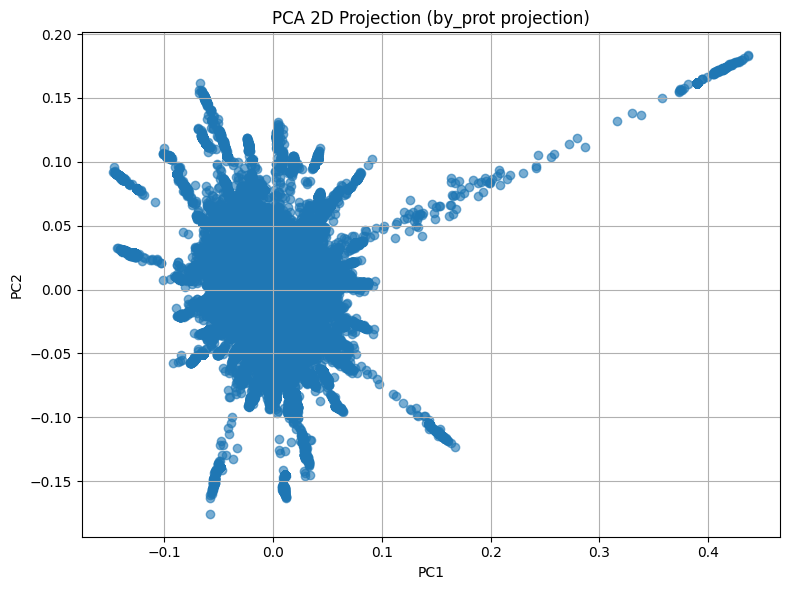

In [ ]:
# Choose configs to compare
projection_methods = {
    "by_prot": apply_random_projection_by_prot,
    "global": apply_random_projection_globaly
}

n_components_proj = 500  # Dimensionality after projection
n_clusters = 3  # For KMeans

def analyze_representation(att_data, label, show_tsne=True):
    print(f"\n===== Analyzing representation: {label} =====")

    # PCA
    pca = PCA(n_components=0.95)
    att_pca = pca.fit_transform(att_data)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"PCA (95% variance) → shape: {att_pca.shape}, explained variance: {explained_variance:.4f}")

    # Plot PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(att_pca[:, 0], att_pca[:, 1], alpha=0.6)
    plt.title(f'PCA 2D Projection ({label})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # t-SNE
    if show_tsne:
        tsne = TSNE(n_components=2, perplexity=30, random_state=42)
        att_tsne = tsne.fit_transform(att_data)
        plt.figure(figsize=(8, 6))
        plt.scatter(att_tsne[:, 0], att_tsne[:, 1], alpha=0.6)
        plt.title(f't-SNE 2D Projection ({label})')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(att_data)
    sil_score = silhouette_score(att_data, kmeans.labels_)
    print(f"KMeans Silhouette Score ({n_clusters} clusters): {sil_score:.4f}")

    # Correlation heatmap
    corr = np.corrcoef(att_data, rowvar=False)
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, cmap='coolwarm')
    plt.title(f'Correlation Heatmap ({label})')
    plt.tight_layout()
    plt.show()


# Run analysis for both projection methods
for method_name, projection_func in projection_methods.items():
    print(f"\n>>> Applying {method_name} random projection...")

    if method_name == "by_prot":
        projected = np.vstack(list(attention_weights_by_prot.values()))
    else:
        projected = projection_func(attention_weights, n_components=n_components_proj)


    analyze_representation(projected, label=f"{method_name} projection")